In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot
import seaborn as sns

sns.set(style="white") 
sns.set(style="whitegrid", color_codes=True)

In [2]:
# importing dataset
df = pd.read_csv('DS3_C6_S3_Clustering_AbsenteeismAtWork_Data_Project.csv', delimiter = ';')
df.head()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26,7,3,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,239.554,...,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,239.554,...,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,239.554,...,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,2


In [3]:
# finding out the no of columns and rows 
df.shape

(740, 21)

In [4]:
# description of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ID                               740 non-null    int64  
 1   Reason for absence               740 non-null    int64  
 2   Month of absence                 740 non-null    int64  
 3   Day of the week                  740 non-null    int64  
 4   Seasons                          740 non-null    int64  
 5   Transportation expense           740 non-null    int64  
 6   Distance from Residence to Work  740 non-null    int64  
 7   Service time                     740 non-null    int64  
 8   Age                              740 non-null    int64  
 9   Work load Average/day            740 non-null    float64
 10  Hit target                       740 non-null    int64  
 11  Disciplinary failure             740 non-null    int64  
 12  Education             

In [5]:
# checking null values, if any
df.isnull().sum()

ID                                 0
Reason for absence                 0
Month of absence                   0
Day of the week                    0
Seasons                            0
Transportation expense             0
Distance from Residence to Work    0
Service time                       0
Age                                0
Work load Average/day              0
Hit target                         0
Disciplinary failure               0
Education                          0
Son                                0
Social drinker                     0
Social smoker                      0
Pet                                0
Weight                             0
Height                             0
Body mass index                    0
Absenteeism time in hours          0
dtype: int64

In [6]:
# droping columns which seems not to directly effect the prediction
df_a = df.drop(['ID', 
                'Month of absence', 
                'Day of the week', 
                'Seasons', 
                'Disciplinary failure', 
                'Education', 
                'Son', 
                'Social drinker', 
                'Social smoker', 
                'Pet', 
                'Weight', 
                'Height', 
                'Body mass index'], axis = 1)
df_a.shape

(740, 8)

In [7]:
df_a.columns = df_a.columns.str.replace('/', ' ').str.strip()
df_a.rename(columns={'Reason for absence': 'Reason_for_absence', 
                   'Transportation expense': 'Transportation_expense', 
                   'Distance from Residence to Work': 'Distance_from_Residence_to_Work',
                   'Service time': 'Service_time',
                   'Work load Average day': 'Work_load_Average_day',
                   'Hit target': 'Hit_target',
                   'Absenteeism time in hours': 'Absenteeism_time_in_hours'}, inplace=True)
df_a.head(1)

,Reason_for_absence,Transportation_expense,Distance_from_Residence_to_Work,Service_time,Age,Work_load_Average_day,Hit_target,Absenteeism_time_in_hours
0,26,289,36,13,33,239.554,97,4


In [8]:
# finding maximum value columns, to be used to bin.

print("max reason for absence: ", df_a['Reason_for_absence'].max(), "and min reason for absence: ", df_a['Reason_for_absence'].min())
print("max transportation expense: ", df_a['Transportation_expense'].max(), "and min transportation expense: ", df_a['Transportation_expense'].min())
print("max distance from residence to work: ", df_a['Distance_from_Residence_to_Work'].max(), "and min distance from residence to work: ", df_a['Distance_from_Residence_to_Work'].min())
print("max service time: ", df_a['Service_time'].max(), "and min service time: ", df_a['Service_time'].min())
print("max age: ", df_a['Age'].max(), "and min age: ", df_a['Age'].min())
print("max average work load per day: ", df_a['Work_load_Average_day'].max(), "and min average work load per day: ", df_a['Work_load_Average_day'].min())
print("max hit target: ", df_a['Hit_target'].max(), "and min hit target: ", df_a['Hit_target'].min())
print("max Absenteeism time in hours: ", df_a['Absenteeism_time_in_hours'].max(), "and min Absenteeism time in hours: ", df_a['Absenteeism_time_in_hours'].min())

max reason for absence:  28 and min reason for absence:  0
max transportation expense:  388 and min transportation expense:  118
max distance from residence to work:  52 and min distance from residence to work:  5
max service time:  29 and min service time:  1
max age:  58 and min age:  27
max average work load per day:  378.884 and min average work load per day:  205.917
max hit target:  100 and min hit target:  81
max Absenteeism time in hours:  120 and min Absenteeism time in hours:  0


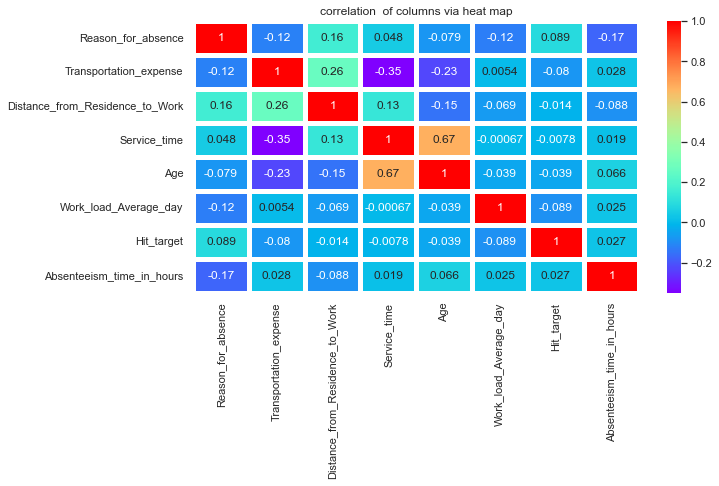

In [9]:
# heap map will show the correlation of columns

fig, ax = plt.subplots(figsize = (10, 5))
sns.heatmap(df_a.corr(), cmap = 'rainbow', annot = True, linewidth = 5).set_title('correlation  of columns via heat map')
plt.show()

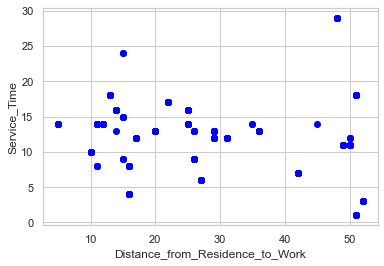

In [10]:
# distribution of DISTANCE to SERVICE TIME: 0.13
plt.scatter(df_a.Distance_from_Residence_to_Work, df_a.Service_time, color = 'blue')
plt.xlabel('Distance_from_Residence_to_Work')
plt.ylabel('Service_Time');

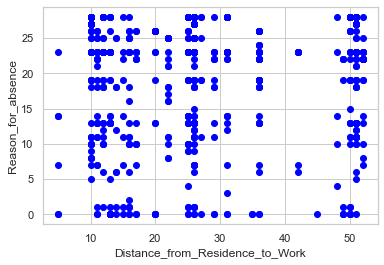

In [11]:
# distribution of DISTANCE to REASON FOR ABSENCE: 0.16
plt.scatter(df_a.Distance_from_Residence_to_Work, df_a.Reason_for_absence, color = 'blue')
plt.xlabel('Distance_from_Residence_to_Work')
plt.ylabel('Reason_for_absence');

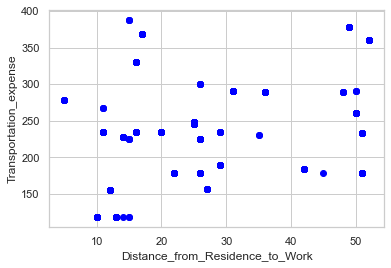

In [12]:
# distribution of DISTANCE to TRANSPORT EXPENSE: 0.26
plt.scatter(df_a.Distance_from_Residence_to_Work, df_a.Transportation_expense, color = 'blue')
plt.xlabel('Distance_from_Residence_to_Work')
plt.ylabel('Transportation_expense');

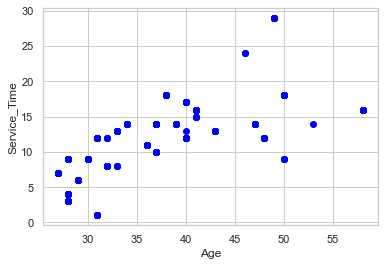

In [13]:
# distribution of AGE to SERVICE TIME: 0.67
plt.scatter(df_a.Age, df_a.Service_time, color = 'blue')
plt.xlabel('Age')
plt.ylabel('Service_Time');

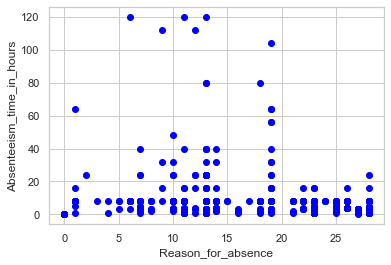

In [14]:
# distribution of Reason_for_absence to Absenteeism_time_in_hours
plt.scatter(df_a.Reason_for_absence, df_a.Absenteeism_time_in_hours, color = 'blue')
plt.xlabel('Reason_for_absence')
plt.ylabel('Absenteeism_time_in_hours');

In [15]:
df_scale = df_a

from sklearn.preprocessing import StandardScaler

scale = StandardScaler()

scale_columns = ['Reason_for_absence', 
                 'Transportation_expense', 
                 'Distance_from_Residence_to_Work', 
                 'Service_time',
                 'Age',
                 'Work_load_Average_day',
                 'Hit_target',
                 'Absenteeism_time_in_hours']

df_scale[scale_columns] = scale.fit_transform(df_a[scale_columns])
df_scale.head()

,Reason_for_absence,Transportation_expense,Distance_from_Residence_to_Work,Service_time,Age,Work_load_Average_day,Hit_target,Absenteeism_time_in_hours
0,0.804938,1.011408,0.429556,0.101770,-0.532868,-0.818212,0.638686,-0.219511
1,-2.280124,-1.544379,-1.121694,1.242825,2.092860,-0.818212,0.638686,-0.519767
2,0.448970,-0.632665,1.441240,1.242825,0.239405,-0.818212,0.638686,-0.369639
3,-1.449530,0.861947,-1.661258,0.329981,0.393859,-0.818212,0.638686,-0.219511
4,0.448970,1.011408,0.429556,0.101770,-0.532868,-0.818212,0.638686,-0.369639


In [16]:
df_scale.shape

(740, 8)

### Elbow Method

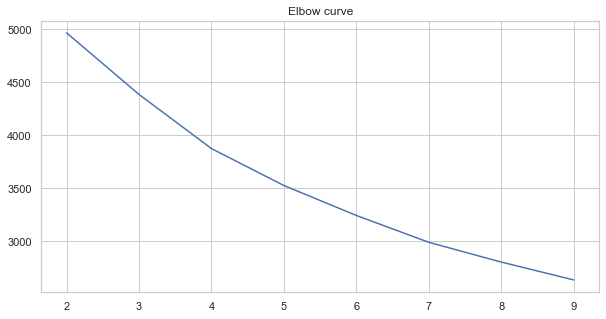

In [17]:
from sklearn.cluster import KMeans
distorsions = []

for k in range(2, 10):
    kmeans = KMeans(n_clusters = k)
    kmeans.fit(df_scale)
    distorsions.append(kmeans.inertia_)

fig = plt.figure(figsize = (10, 5))
plt.plot(range(2, 10), distorsions)
plt.grid(True)
plt.title('Elbow curve');

### K-MEANS

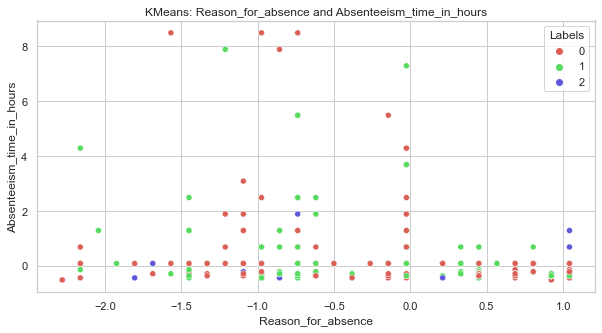

In [18]:
# KMeans: Reason_for_absence and Absenteeism_time_in_hours

km = KMeans(n_clusters = 3).fit(df_scale)

df_a['Labels'] = km.labels_
plt.figure(figsize=(10, 5))
sns.scatterplot(df_a['Reason_for_absence'], df_a['Absenteeism_time_in_hours'], hue = df_a['Labels'], palette=sns.color_palette('hls', np.unique(km.labels_).shape[0]))
plt.title('KMeans: Reason_for_absence and Absenteeism_time_in_hours')
plt.show()

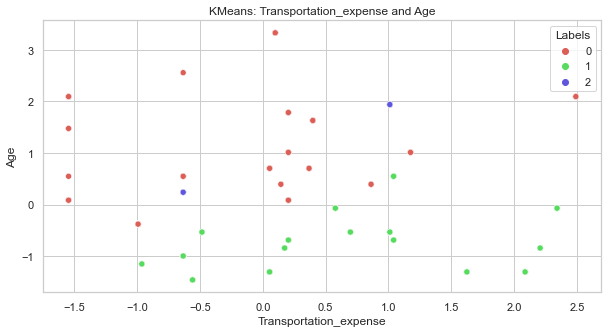

In [19]:
# KMeans: Transportation_expense and Age

km = KMeans(n_clusters = 3).fit(df_scale)

df_a['Labels'] = km.labels_
plt.figure(figsize=(10, 5))
sns.scatterplot(df_a['Transportation_expense'], df_a['Age'], hue = df_a['Labels'], palette=sns.color_palette('hls', np.unique(km.labels_).shape[0]))
plt.title('KMeans: Transportation_expense and Age')
plt.show()

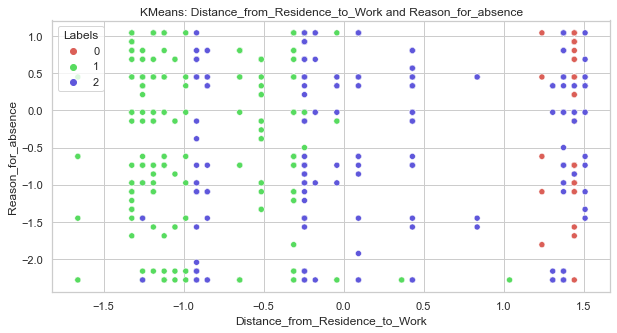

In [20]:
# KMeans: Distance_from_Residence_to_Work and Reason_for_absence

km = KMeans(n_clusters = 3).fit(df_scale)

df_a['Labels'] = km.labels_
plt.figure(figsize=(10, 5))
sns.scatterplot(df_a['Distance_from_Residence_to_Work'], df_a['Reason_for_absence'], hue = df_a['Labels'], palette=sns.color_palette('hls', np.unique(km.labels_).shape[0]))
plt.title('KMeans: Distance_from_Residence_to_Work and Reason_for_absence')
plt.show()

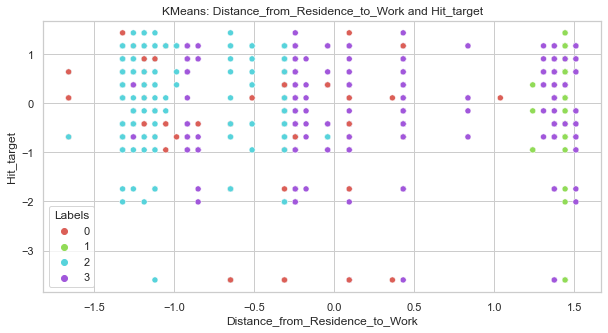

In [21]:
# KMeans: Distance_from_Residence_to_Work and Hit_target

km = KMeans(n_clusters = 4).fit(df_scale)

df_a['Labels'] = km.labels_
plt.figure(figsize=(10, 5))
sns.scatterplot(df_a['Distance_from_Residence_to_Work'], df_a['Hit_target'], hue = df_a['Labels'], palette=sns.color_palette('hls', np.unique(km.labels_).shape[0]))
plt.title('KMeans: Distance_from_Residence_to_Work and Hit_target')
plt.show()

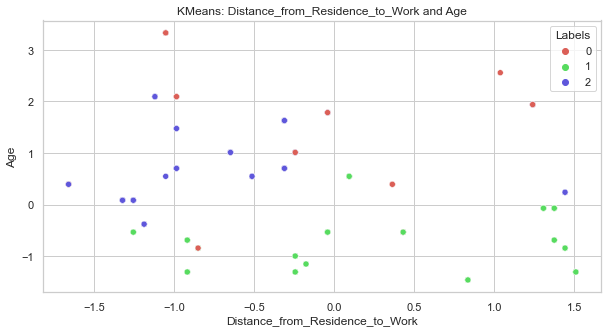

In [22]:
# KMeans: Distance_from_Residence_to_Work and Age

km = KMeans(n_clusters = 3).fit(df_scale)

df_a['Labels'] = km.labels_
plt.figure(figsize=(10, 5))
sns.scatterplot(df_a['Distance_from_Residence_to_Work'], df_a['Age'], hue = df_a['Labels'], palette=sns.color_palette('hls', np.unique(km.labels_).shape[0]))
plt.title('KMeans: Distance_from_Residence_to_Work and Age')
plt.show()

### K-MEANS clustering conclusion:
#### THOUGH THE CLUSTERS IN THE ABOVE GRAPH LOOKS FINE, BUT SOME OVERLAPING IS ALSO OBSERVED, ALSO OUTLIERS HAS BEEN INCLUIDED IN THE CLUSTERS.
##### 1. ONE OF THE ADVANTAGES OF K-MEANS IS IT'S VERY SIMPLE ALGORITHM AND ALSO FAST TO USE.
##### 2. DISADVANTAGES MAY BE, IT TAKES IN CONSIDERATION ALL THE DATA POINTS AND CREATES A CENTROID.
##### 3. OUTLIERS ARE NEGLECTED, THUS CLUSTERS ARE COMPLEX WITH DIFFERENT DENSITIES AND NESTED CLUSTERS.
##### 4. CHOOSING THE K VALUE IS ALSO A CHALLENGE WITHOUT PERFORMING A ELBOW SCORE BEFORE HAND.

### Agglomerative Clustering

In [23]:
n_clusters = [3]
n_link = ['average']

from sklearn.cluster import AgglomerativeClustering

AgglomerativeClustering(linkage='average', n_clusters=3)


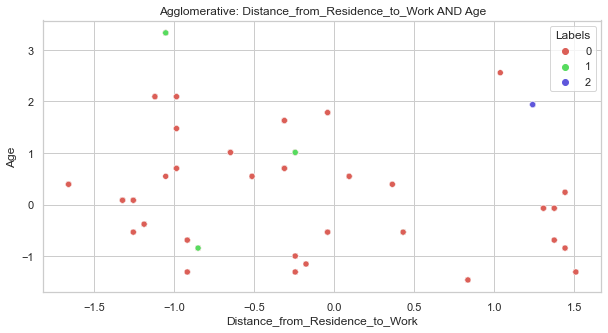

In [24]:
# Distance_from_Residence_to_Work AND Age

for c in n_clusters:
    linkage = n_link
    for l in linkage:
        model = AgglomerativeClustering(n_clusters = c, linkage = l)
        model = model.fit(df_a)
        print(model)
        df_a['Labels'] = model.labels_
        plt.figure(figsize=(10, 5))
        sns.scatterplot(df_a['Distance_from_Residence_to_Work'], df_a['Age'], hue = df_a['Labels'], palette=sns.color_palette('hls', np.unique(model.labels_).shape[0]))
        plt.title('Agglomerative: Distance_from_Residence_to_Work AND Age')
        plt.show()

AgglomerativeClustering(linkage='average', n_clusters=3)


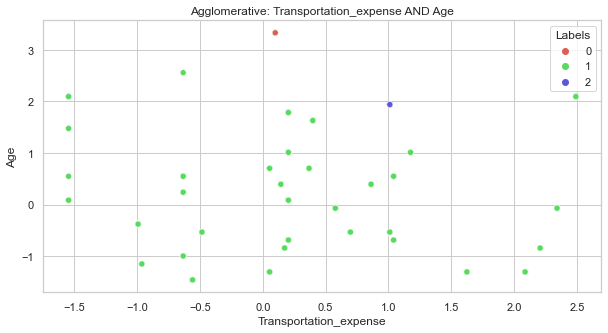

In [25]:
# Transportation_expense AND Age

for c in n_clusters:
    linkage = n_link
    for l in linkage:
        model = AgglomerativeClustering(n_clusters = c, linkage = l)
        model = model.fit(df_a)
        print(model)
        df_a['Labels'] = model.labels_
        plt.figure(figsize=(10, 5))
        sns.scatterplot(df_a['Transportation_expense'], df_a['Age'], hue = df_a['Labels'], palette=sns.color_palette('hls', np.unique(model.labels_).shape[0]))
        plt.title('Agglomerative: Transportation_expense AND Age')
        plt.show()

AgglomerativeClustering(linkage='average', n_clusters=3)


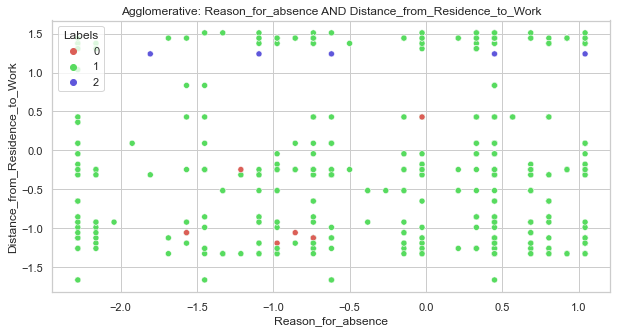

In [26]:
# Reason_for_absence AND Distance_from_Residence_to_Work

for c in n_clusters:
    linkage = n_link
    for l in linkage:
        model = AgglomerativeClustering(n_clusters = c, linkage = l)
        model = model.fit(df_a)
        print(model)
        df_a['Labels'] = model.labels_
        plt.figure(figsize=(10, 5))
        sns.scatterplot(df_a['Reason_for_absence'], df_a['Distance_from_Residence_to_Work'], hue = df_a['Labels'], palette=sns.color_palette('hls', np.unique(model.labels_).shape[0]))
        plt.title('Agglomerative: Reason_for_absence AND Distance_from_Residence_to_Work')
        plt.show()

AgglomerativeClustering(linkage='average', n_clusters=3)


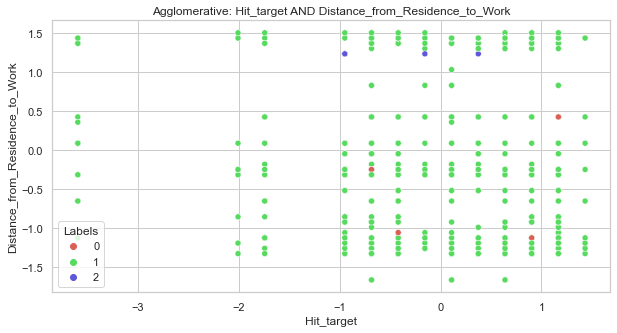

In [27]:
# Hit_target AND Distance_from_Residence_to_Work

for c in n_clusters:
    linkage = n_link
    for l in linkage:
        model = AgglomerativeClustering(n_clusters = c, linkage = l)
        model = model.fit(df_a)
        print(model)
        df_a['Labels'] = model.labels_
        plt.figure(figsize=(10, 5))
        sns.scatterplot(df_a['Hit_target'], df_a['Distance_from_Residence_to_Work'], hue = df_a['Labels'], palette=sns.color_palette('hls', np.unique(model.labels_).shape[0]))
        plt.title('Agglomerative: Hit_target AND Distance_from_Residence_to_Work')
        plt.show()

AgglomerativeClustering(linkage='average', n_clusters=3)


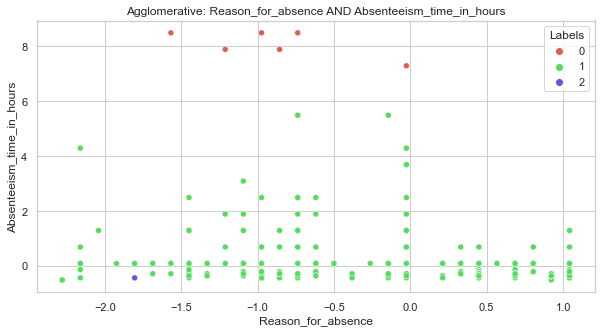

In [28]:
# Reason_for_absence AND Absenteeism_time_in_hours

for c in n_clusters:
    linkage = n_link
    for l in linkage:
        model = AgglomerativeClustering(n_clusters = c, linkage = l)
        model = model.fit(df_a)
        print(model)
        df_a['Labels'] = model.labels_
        plt.figure(figsize=(10, 5))
        sns.scatterplot(df_a['Reason_for_absence'], df_a['Absenteeism_time_in_hours'], hue = df_a['Labels'], palette=sns.color_palette('hls', np.unique(model.labels_).shape[0]))
        plt.title('Agglomerative: Reason_for_absence AND Absenteeism_time_in_hours')
        plt.show()

### AGGLOMERATIVE clustering conclusion:
#### ALMOST ALL TYPES OF AGGLOMERATIVE GRAPHS ARE GIVING NEAR RESULTS, BETTER THAN K-MEANS.
##### 1. IT WORKS WELL WITH EVEN CLUSTER SIZES, ALTHOUGH IT DONT DO JUSTICE TO DISTURBANCES.
##### 2. AGGLOMERATIVE IS NOT SUITABLE FOR LARTGE DATSETS.
##### 3. HERE, NO OF CLUSTERS ARE MANDATORY TO DEFINE.

In [29]:
# Get the unique values of label column
df_a.Labels.unique()

array([1, 0, 2], dtype=int64)

In [30]:
# creating bins for labels and adding the same to dataframe

bins = [-1, 0, 1, 2]
slot = ['DISCIPLINARY_ACTION',
        'CAUTION',
        'PRIMARY_WARNING']

df_a['ACTIONABLE_CATEGORY'] = pd.cut(df_a['Labels'], bins = bins, labels = slot)

df_a.head()

,Reason_for_absence,Transportation_expense,Distance_from_Residence_to_Work,Service_time,Age,Work_load_Average_day,Hit_target,Absenteeism_time_in_hours,Labels,ACTIONABLE_CATEGORY
0,0.804938,1.011408,0.429556,0.101770,-0.532868,-0.818212,0.638686,-0.219511,1,CAUTION
1,-2.280124,-1.544379,-1.121694,1.242825,2.092860,-0.818212,0.638686,-0.519767,1,CAUTION
2,0.448970,-0.632665,1.441240,1.242825,0.239405,-0.818212,0.638686,-0.369639,1,CAUTION
3,-1.449530,0.861947,-1.661258,0.329981,0.393859,-0.818212,0.638686,-0.219511,1,CAUTION
4,0.448970,1.011408,0.429556,0.101770,-0.532868,-0.818212,0.638686,-0.369639,1,CAUTION


In [31]:
Absenteeism_file = df_a.to_csv('Absenteeism_file.csv')